In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from scipy import signal
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import svd
from numpy.linalg import multi_dot
from scipy.linalg import solve
import numpy.polynomial.polynomial as poly
import os
import csv
from sklearn.metrics import r2_score 

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)

In [2]:
csv_file_path='C:/Users/Asus/Desktop/practical/SVD/csv files/'
file_name='green_edited.csv'

In [3]:
datafile = open(csv_file_path+file_name, 'r')
datareader = csv.reader(datafile, delimiter=';')
data = []
for i in datareader:
    row=[]
    i = i[0].split(",")
    for j in i:
        row.append(float(j))
    data.append(row)    
#print(data)
D=np.array(data)
print(len(D))

15


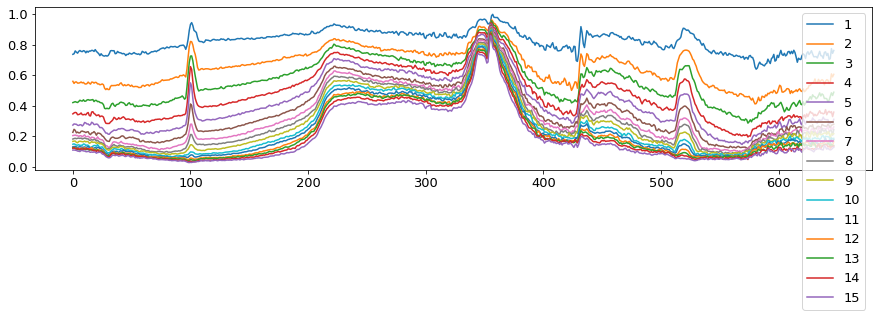

In [4]:
plt.figure(figsize=(15,3))
for i in range(len(D)):
    plt.plot(D[i],label=i+1)
plt.legend()
plt.show()    

In [5]:
U, S, VT = svd(D)
#print(S)
print(np.shape(D))
print(np.shape(U))
print(np.shape(S))
print(np.shape(VT))

(15, 648)
(15, 15)
(15,)
(648, 648)


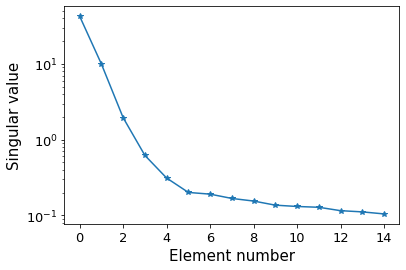

significance level:96.92685941684947


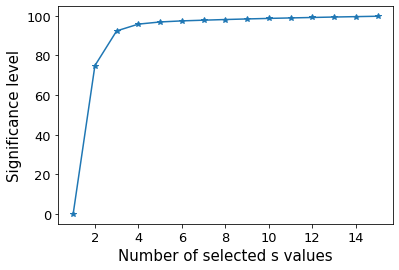

In [6]:
plt.figure(1)
plt.semilogy(S,'*-')
#plt.title("singular values")
plt.xlabel("Element number")
plt.ylabel("Singular value")
plt.show()

selected_vals=4                                    #edit that to change significant level
sig_level=(np.sum(S[0:selected_vals])/np.sum(S))*100
print('significance level:'+str(sig_level))

sig_ar=[]
for i in range(len(S)):
    sig_level=(np.sum(S[0:i])/np.sum(S))*100
    sig_ar.append(sig_level)
    
plt.plot(range(1,len(S)+1),sig_ar,"*-")
plt.xlabel("Number of selected s values")
plt.ylabel("Significance level")
plt.show()

In [7]:
V=np.transpose(VT)
D_new=[]

for i in range(len(D)):
    val=0
    for j in range(selected_vals):
        val+=U[i][j]*S[j]*VT[j]
        
    D_new.append(val)

print(np.shape(D_new)) 
#print(np.matrix(D_new))

(15, 648)


## Concentration model

In [8]:
U_new=U[0:len(U),0:selected_vals]
#print(np.shape(U))
#print(np.shape(U_new))
#print(U_new)


In [9]:
U_new_T=np.transpose(U_new)
I=np.matmul(U_new_T,U_new)
#print(I)


In [10]:
con_T=np.matrix([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
#con_T=np.matrix([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
#con_T=np.matrix([1,2,2.5,3,3.5,4,5])
A= np.matrix(np.dot(con_T,U_new))
print(A)
#print(np.matmul(A,I))

[[-46.25013632  49.53606408  16.96535184  -8.61291469]]


In [11]:
M1=np.dot(con_T,U_new)
print(M1[0])

[[-46.25013632  49.53606408  16.96535184  -8.61291469]]


In [12]:
M = np.linalg.lstsq(U_new, np.transpose(con_T),rcond=-1)
#print(M[0])


### The modle test 1

In [13]:
x=np.matmul(A,U_new.T)
print(np.shape(x))
print(np.shape(U_new.T))
print(np.shape(A))

x0=np.matmul(U_new,M[0])
#print(x0)
#print((np.matrix(con_T)).T)

print(np.array(x)[0])

(1, 15)
(4, 15)
(1, 4)
[ 1.53270988  4.85845853  6.07191686  8.0255684   9.63775736 11.6262968
 13.64998165 15.57646969 17.83466552 20.91710669 22.71128897 24.65822901
 26.19724113 27.96097404 28.69010041]


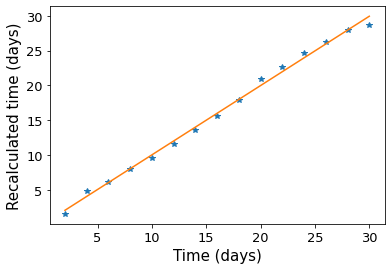

[0.05769893 0.99618034]


In [14]:
plt.plot(np.array(con_T)[0],np.array(x)[0],'*')
coefs2 = poly.polyfit(np.array(con_T)[0], np.array(x)[0], 1)
ffit2 = poly.polyval(np.array(con_T)[0], coefs2)
plt.plot(np.array(con_T)[0], ffit2)
plt.ylabel("Recalculated time (days)")
plt.xlabel("Time (days)")
plt.show()
print(coefs2 )

In [15]:
cc2=np.corrcoef(np.array(con_T)[0],np.array(x)[0])
print(cc2)

[[1.         0.99772196]
 [0.99772196 1.        ]]


### test 2

In [16]:
as_c=[]
for k in range(len(D)):
    con_T1=np.delete(con_T,k)
    U_new1=np.delete((U_new),k,0)
    
    A1= np.matrix(np.matmul(con_T1,U_new1))
    
    x1=np.matmul(A1,(U_new[k]).T)
    x2=np.matmul(A1,U_new1.T)
    print(x1)
    
    as_c.append(np.array(x1)[0][0])
plt.show()    
print(as_c)    

[[-0.24855355]]
[[3.44861653]]
[[4.43284527]]
[[5.71260174]]
[[7.60056799]]
[[9.62077561]]
[[10.8469657]]
[[12.35034805]]
[[14.40845583]]
[[17.97657665]]
[[20.02746119]]
[[21.24300029]]
[[21.64718744]]
[[20.36036655]]
[[17.47617729]]
[-0.24855354921263562, 3.4486165306602854, 4.432845265724968, 5.712601735646933, 7.600567990434372, 9.620775612705543, 10.84696570187004, 12.350348051204168, 14.408455832203455, 17.976576648532063, 20.027461189803162, 21.243000288044662, 21.64718744474458, 20.360366547341513, 17.476177293783824]


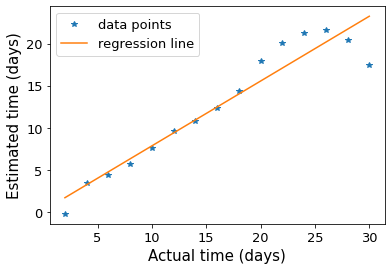

[0.13763495 0.77016195]


In [17]:
plt.plot(np.array(con_T)[0],as_c,'*',label="data points")

coefs = poly.polyfit(np.array(con_T)[0], as_c, 1)
ffit = poly.polyval(np.array(con_T)[0], coefs)
plt.plot(np.array(con_T)[0], ffit,label="regression line")
plt.xlabel('Actual time (days)')
plt.ylabel('Estimated time (days)')
plt.legend()
plt.show()
print(coefs)

In [18]:
cc=np.corrcoef(np.array(con_T)[0],as_c)
print(cc)

[[1.         0.95554201]
 [0.95554201 1.        ]]


In [19]:
R_square = r2_score(as_c, ffit) 
print(R_square)

0.9130605412369556
